 En un centro de datos de alta eficiencia se monitorean continuamente diversos
 parámetros críticos para garantizar el rendimiento óptimo de los sistemas.
 Uno de los parámetros más relevantes es la temperatura de los servidores.
 Tras un análisis exhaustivo, se concluye que la temperatura de los servidores
 se distribuye de forma normal con una media de µ = 35◦C y una desviación
 estándar de σ = 2,5◦C. A partir de esta información, resuelva las siguientes
 cuestiones:

In [51]:
#Nota: Utilizare librerias porque no hay ninguna especificación en la consigna de no hacerlo.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns


Realice las gráficas correspondientes a la función de densidad de probabilidad (pdf) 
y a la función de distribución acumulada (cdf) de la temperatura de los servidores.

In [52]:
#definir partes de la función
mu = 35
sigma = 2.5
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000) 

# este es la función de densidad de probabilidad
pdf = norm.pdf(x, mu, sigma)
# este es la función de distribución acumulada
cdf = norm.cdf(x, mu, sigma)


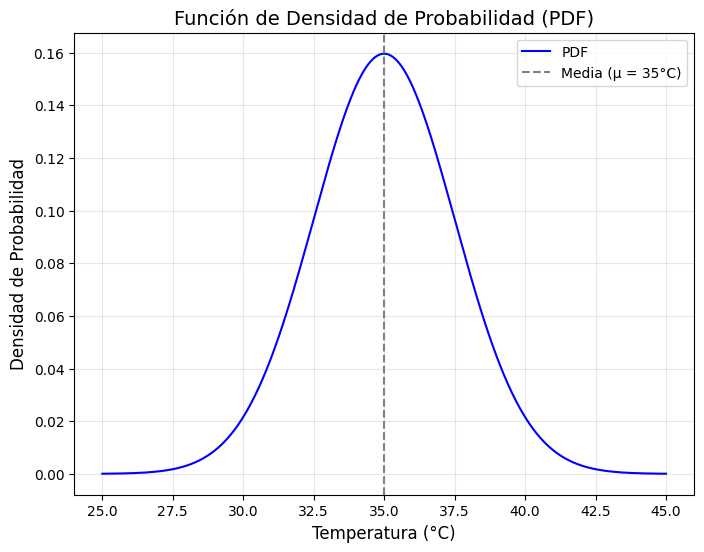

In [53]:
# graficar pdf
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label="PDF", color="blue")
plt.axvline(mu, color='gray', linestyle='--', label=f'Media (μ = {mu}°C)')
plt.title("Función de Densidad de Probabilidad (PDF)", fontsize=14)
plt.xlabel("Temperatura (°C)", fontsize=12)
plt.ylabel("Densidad de Probabilidad", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

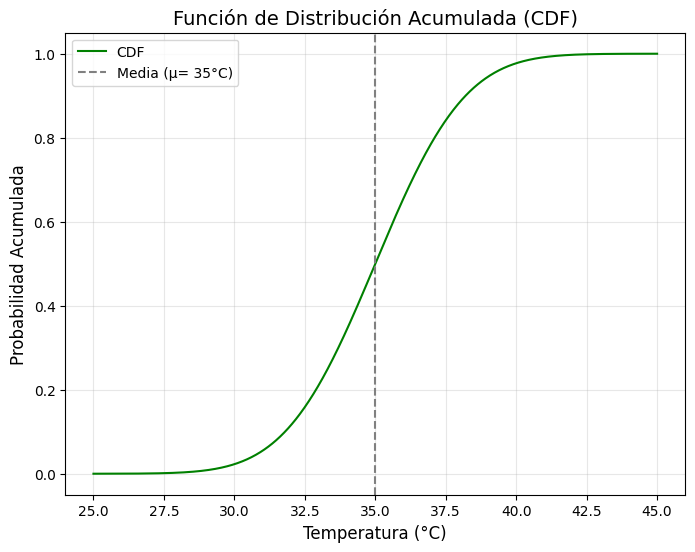

In [54]:
# Graficar CDF
plt.figure(figsize=(8, 6))
plt.plot(x, cdf, label="CDF", color="green")
plt.title("Función de Distribución Acumulada (CDF)", fontsize=14)
plt.axvline(mu, color='gray', linestyle='--', label=f'Media (μ= {mu}°C)')
plt.xlabel("Temperatura (°C)", fontsize=12)
plt.ylabel("Probabilidad Acumulada", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

El sistema de enfriamiento se activa automáticamente cuando la temperatura supera los 40◦C. Calcule la probabilidad de que, para un servidor seleccionado al azar, el sistema de enfriamiento se active.

In [55]:
#Vamos a calcular la probabilidad acumulada de que X sea < a 40°c y > 40°c
#Vamos a sacar el valor estandarizado 

z= (40 - mu) / sigma

#probabilidad acumulada de que X sea < a 40°c
prob_menor = (norm.cdf(z))*100
print(f"La probabilidad de que la temperatura sea menor a 40°C es: {prob_menor:.2f}%")

#probabilidad acumulada de que X sea > a 40°c
prob_mayor = (1 - norm.cdf(40, mu, sigma))*100
print(f"La probabilidad de que la temperatura sea mayor a 40°C es: {prob_mayor:.2f}%")


La probabilidad de que la temperatura sea menor a 40°C es: 97.72%
La probabilidad de que la temperatura sea mayor a 40°C es: 2.28%


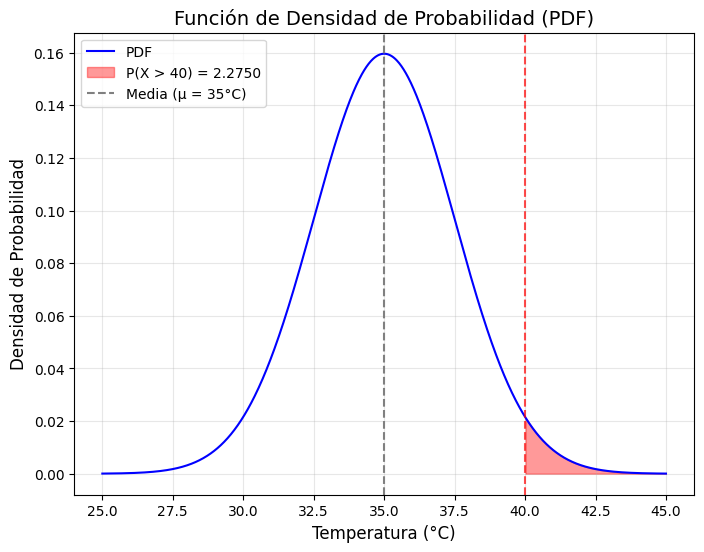

In [56]:
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label="PDF", color="blue")
plt.fill_between(x, 0, pdf, where=(x >= 40), color='red', alpha=0.4, label=f'P(X > 40) = {prob_mayor:.4f}')
plt.axvline(mu, color='gray', linestyle='--', label=f'Media (μ = {mu}°C)')
plt.axvline(40, color='red', linestyle='--', alpha=0.7)
plt.title("Función de Densidad de Probabilidad (PDF)", fontsize=14)
plt.xlabel("Temperatura (°C)", fontsize=12)
plt.ylabel("Densidad de Probabilidad", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Se sabe que los servidores operan de manera óptima cuando su temperatura se encuentra entre 30◦C y 38◦C. Determine el porcentaje de tiempo de que un servidor opere dentro de este rango de temperatura óptimo?

In [57]:
#Vamos a calcular la probabilidad acumulada de que X este en el rango de temperatura óptimo [30°c,38°c]
porcentaje_tiempo_temp_optima = (norm.cdf(38, mu, sigma) - norm.cdf(30, mu, sigma))*100

print(f"El servidor opera dentro del rango óptimo de temperatura el {porcentaje_tiempo_temp_optima:.2f}% del tiempo.")


El servidor opera dentro del rango óptimo de temperatura el 86.22% del tiempo.


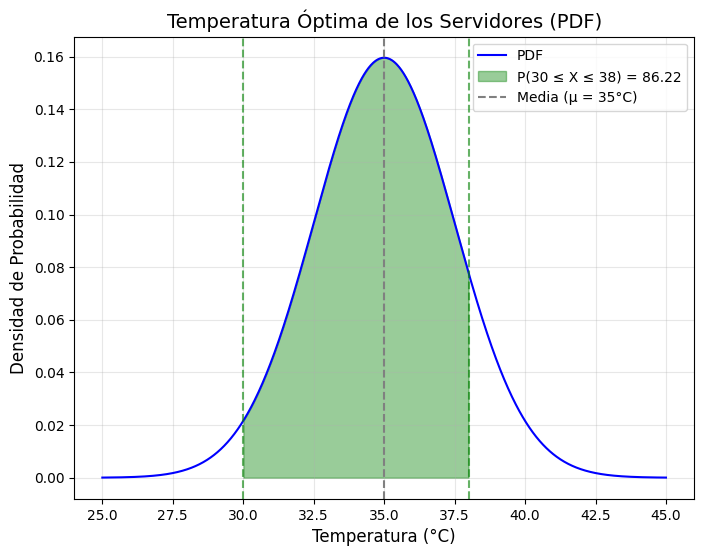

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label="PDF", color="blue")
plt.fill_between(x, 0, pdf, where=(x >= 30) & (x <= 38), color='green', alpha=0.4,
                 label=f'P(30 ≤ X ≤ 38) = {porcentaje_tiempo_temp_optima:.2f}')
plt.axvline(mu, color='gray', linestyle='--', label=f'Media (μ = {mu}°C)')
plt.axvline(30, color='Green', linestyle='--', alpha=0.6)
plt.axvline(38, color='Green', linestyle='--', alpha=0.6)
plt.title("Temperatura Óptima de los Servidores (PDF)", fontsize=14)
plt.xlabel("Temperatura (°C)", fontsize=12)
plt.ylabel("Densidad de Probabilidad", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()